# Tutorial on Image Clustering

## Part 1

by Joris Guérin

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

## Clustering

### Toy data generation

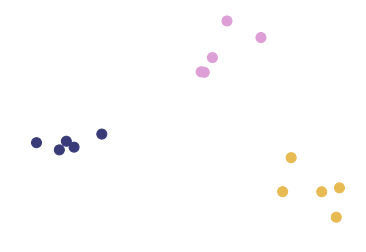

In [2]:
n_pts = 5

mean1, mean2, mean3 = np.array([2,3]), np.array([7,1]), np.array([5,6])
cov = np.array([[0.3, 0],[0, 0.3]])

group1 = np.random.multivariate_normal(mean1, cov, n_pts)
group2 = np.random.multivariate_normal(mean2, cov, n_pts)
group3 = np.random.multivariate_normal(mean3, cov, n_pts)

data   = np.r_[group1, group2, group3]
labels = np.array([0] * n_pts + [1] * n_pts + [2] * n_pts)

plt.scatter(data[:,0], data[:,1], c = labels, s=100, cmap = plt.get_cmap("tab20b"))
plt.axis('off')
plt.show()

### Unsupervised data

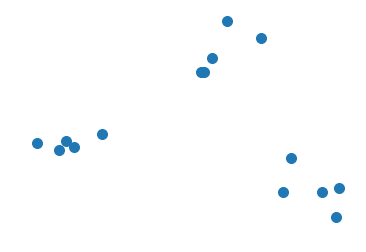

In [3]:
plt.scatter(data[:,0], data[:,1], s=100, cmap = plt.get_cmap("tab20b"))
plt.axis('off')
plt.show()

### K-means clustering

N clusters = 3

- Step 1: initialize 3 centroids as points in the dataset

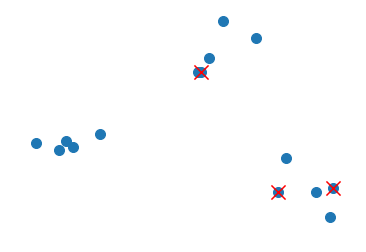

In [4]:
from copy import deepcopy

N_clusters = 3

data_shuffle = deepcopy(data)
np.random.shuffle(data_shuffle)
centroids = data_shuffle[:3, :]

plt.scatter(data[:,0], data[:,1], s=100, cmap = plt.get_cmap("tab20b"))
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='r', s=200)
plt.axis('off')
plt.show()

### K-means clustering

N clusters = 3

- Step 1: initialize 3 centroids as points in the dataset
- Step 2: Minimization step, associate each point with the closest centroid

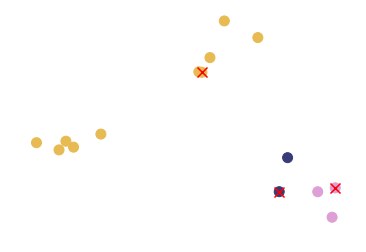

In [5]:
categories = []
for d in data:
    distances = np.linalg.norm((centroids - d)**2, axis = 1)
    categories.append(np.argmin(distances))
categories = np.array(categories)

plt.scatter(data[:,0], data[:,1], c = categories, s=100, cmap = plt.get_cmap("tab20b"))
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='r', s=100)
plt.axis('off')
plt.show()

### K-means clustering

N clusters = 3

- Step 1: initialize 3 centroids as points in the dataset
- Step 2: Maximization step, associate each point with the closest centroid
- Step 3: Expectation step, update the centroids by averaging the clusters

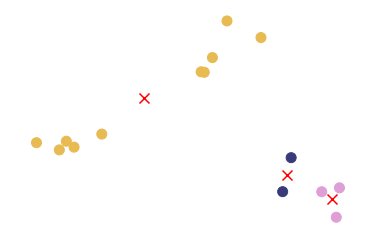

In [6]:
centroids = np.array([np.mean(data[categories == i], axis = 0) 
                for i in range(N_clusters)])

plt.scatter(data[:,0], data[:,1], c = categories, s=100, cmap = plt.get_cmap("tab20b"))
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='r', s=100)
plt.axis('off')
plt.show()

### K-means clustering

N clusters = 3

- Step 1: initialize 3 centroids as points in the dataset
- Repeat until convergence:
    - Minimization step, associate each point with the closest centroid
    - Expectation step, update the centroids by averaging the clusters

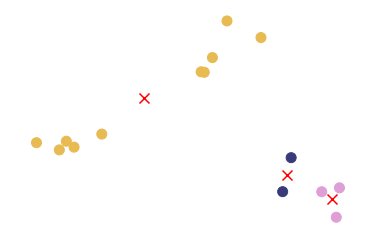

In [7]:
categories = []
for d in data:
    distances = np.linalg.norm((centroids - d)**2, axis = 1)
    categories.append(np.argmin(distances))
categories = np.array(categories)

plt.scatter(data[:,0], data[:,1], c = categories, s=100, cmap = plt.get_cmap("tab20b"))
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='r', s=100)
plt.axis('off')
plt.show()

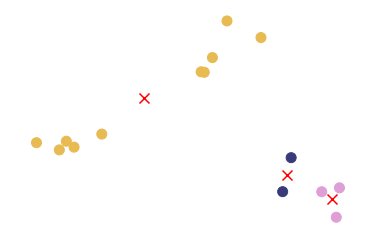

In [8]:
centroids = np.array([np.mean(data[categories == i], axis = 0) 
                for i in range(N_clusters)])

plt.scatter(data[:,0], data[:,1], c = categories, s=100, cmap = plt.get_cmap("tab20b"))
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='r', s=100)
plt.axis('off')
plt.show()

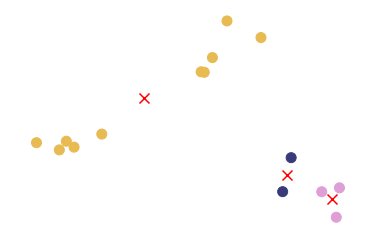

In [9]:
categories = []
for d in data:
    distances = np.linalg.norm((centroids - d)**2, axis = 1)
    categories.append(np.argmin(distances))
categories = np.array(categories)

plt.scatter(data[:,0], data[:,1], c = categories, s=100, cmap = plt.get_cmap("tab20b"))
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='r', s=100)
plt.axis('off')
plt.show()

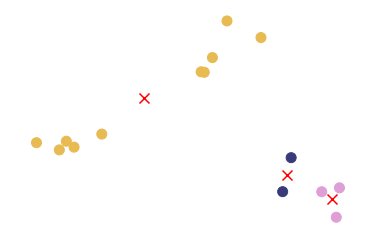

In [10]:
centroids = np.array([np.mean(data[categories == i], axis = 0) 
                for i in range(N_clusters)])

plt.scatter(data[:,0], data[:,1], c = categories, s=100, cmap = plt.get_cmap("tab20b"))
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='r', s=100)
plt.axis('off')
plt.show()

### In practice

use scikit-learn library

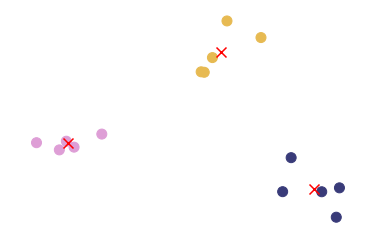

In [11]:
from sklearn.cluster import KMeans

km3 = KMeans(n_clusters = 3)
km3.fit(data)

categories = km3.predict(data)
centroids = km3.cluster_centers_

plt.scatter(data[:,0], data[:,1], c = categories, s=100, cmap = plt.get_cmap("tab20b"))
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='r', s=100)
plt.axis('off')
plt.show()

### Evaluation

* Cannot use standard supervised accuracy

In [12]:
print("True labels:          ", labels)
print("Predicted categories: ", categories)

accuracy = np.sum(labels == categories) / len(labels)

print("Accuracy: ", accuracy)

True labels:           [0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
Predicted categories:  [2 2 2 2 2 0 0 0 0 0 1 1 1 1 1]
Accuracy:  0.0


### Evaluation

* Cannot use standard supervised accuracy
* Metric 1: purity

In [13]:
def confusion_matrix(clusters, true_labels):
    new_tl = deepcopy(true_labels)
    l = list(set(true_labels))
    for i in range(len(true_labels)):
        for j in range(len(l)):
            if true_labels[i] == l[j]:
                new_tl[i] = j
                
    conf_mat = np.zeros([len(set(clusters)), len(set(new_tl))])
    for i in range(len(clusters)):
        conf_mat[clusters[i], new_tl[i]] += 1

    return conf_mat

def purity(clusters, true_labels):
    conf_mat = confusion_matrix(clusters, true_labels)
    sum_clu  = np.max(conf_mat, axis = 1)
    sum_tot  = np.sum(sum_clu)

    pur = sum_tot / len(clusters)

    return pur

print(categories)
print(labels)
print()
print(confusion_matrix(labels, categories))
print()
print("Purity: ", purity(labels, categories))

[2 2 2 2 2 0 0 0 0 0 1 1 1 1 1]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]

[[0. 0. 5.]
 [5. 0. 0.]
 [0. 5. 0.]]

Purity:  1.0


### Evaluation

* Cannot use standard supervised accuracy
* Metric 1: purity
* Metric 2: Normalized mutual information (NMI)

In [14]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

from sklearn.metrics import normalized_mutual_info_score as NMI

print("NMI: ", NMI(labels, categories))

NMI:  1.0


### Evaluation

* Cannot use standard supervised accuracy
* Metric 1: purity
* Metric 2: Normalized mutual information (NMI)
* Metric 3: Fowlkes-Mallows index

In [15]:
from sklearn.metrics import fowlkes_mallows_score as FM

print("FM: ", FM(labels, categories))

FM:  1.0


### Agglomerative clustering

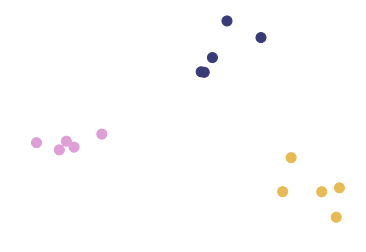

Purity:  1.0
NMI:  1.0
FM:  1.0


In [16]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters = 3)
cat_agg = agg.fit_predict(data)

plt.scatter(data[:,0], data[:,1], c = cat_agg, s=100, cmap = plt.get_cmap("tab20b"))
plt.axis('off')
plt.show()

print("Purity: ", purity(labels, cat_agg))
print("NMI: ", NMI(labels, cat_agg))
print("FM: ", FM(labels, cat_agg))

## Clustering on raw images

### Studied dataset

** UMist **

* Face Database consists of 564 images of 20 individuals (mixed race/gender/appearance)
* 112 x 92, grayscale
* Different orientation for each person

*Wechsler, H., Phillips, J. P., Bruce, V., Soulie, F. F., & Huang, T. S. (Eds.). (2012). Face recognition: From theory to applications (Vol. 163). Springer Science & Business Media.*

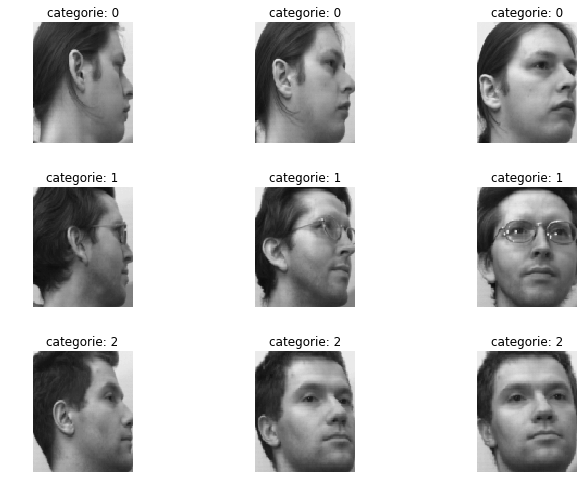

In [17]:
import cv2, matplotlib
matplotlib.rc('figure', figsize=(10, 7))

im_path, lab_path = "./umist/raw", "./umist"

fi = open("%s/true_labels.txt" % lab_path, "r")
true_labels = fi.readlines()
true_labels = np.array([int(lab.rstrip("\n")) for lab in true_labels])
fi.close()

indices = [0, 10, 20, 40, 50, 60, 80, 90, 95]
for i in range(len(indices)):
    im = cv2.imread("%s/%s.png" % (im_path, indices[i]))
    plt.subplot(331 + i)
    plt.imshow(im)
    plt.axis('off')
    plt.title('categorie: %i' % true_labels[indices[i]])
plt.tight_layout()

### Run Agglomerative Clustering on raw data

* 575 images (112 x 92 -> 10304 feature dimesions)
* 20 classes

#### Read and format data

In [18]:
n_im = 575

data = []
for i in range(n_im):
    data.append(cv2.imread("%s/%s.png" % (im_path, i), cv2.IMREAD_GRAYSCALE).flatten())
data = np.array(data)

print("Shape dataset: ", data.shape)

Shape dataset:  (575, 10304)


### Run Agglomerative Clustering on raw data

* 568 images (112 x 92 -> 10304 feature dimesions)
* 20 classes

#### Run Agglomerative Clustering

In [19]:
from sklearn.cluster import AgglomerativeClustering

n_cat = 20

agg20 = AgglomerativeClustering(20)
preds_raw = agg20.fit_predict(data)

print("purity: ", purity(preds_raw, true_labels))
print("NMI: ", NMI(preds_raw, true_labels))
print("FM: ", FM(preds_raw, true_labels))

eval_raw = [purity(preds_raw, true_labels), NMI(preds_raw, true_labels), FM(preds_raw, true_labels)]

purity:  0.5026086956521739
NMI:  0.6632661422248685
FM:  0.379229178257852


### Run Agglomerative Clustering on raw data

* 568 images (112 x 92 -> 10304 feature dimesions)
* 20 classes

#### Visualize results

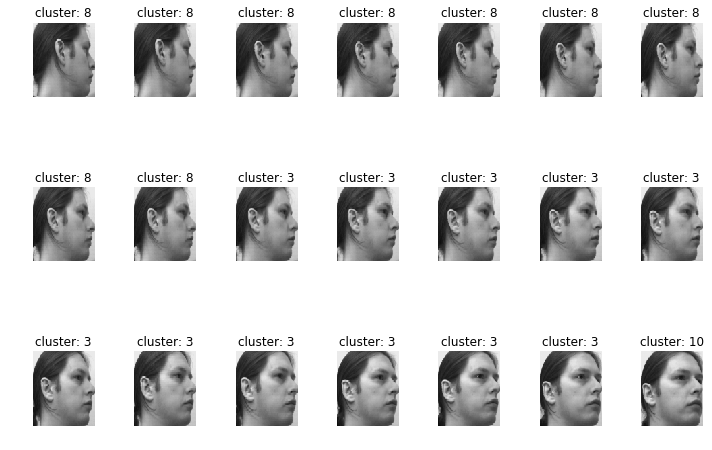

In [20]:
import pylab as pl

for i in range(21):
    im = cv2.imread("%s/%s.png" % (im_path, i))
    pl.subplot(3,7,1 + i)
    plt.imshow(im)
    plt.axis('off')
    plt.title('cluster: %i' % preds_raw[i])
plt.tight_layout()

## Clustering on classic computer vision features

### SIFT features - visualization

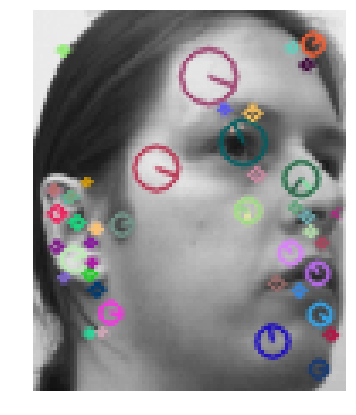

In [21]:
sift_extractor = cv2.xfeatures2d.SIFT_create()

image = cv2.imread("%s/%s.png" % (im_path, 20))
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

kp, desc = sift_extractor.detectAndCompute(image_gray, None)

img_sift = cv2.drawKeypoints(image_gray, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img_sift)
plt.axis('off')
plt.show()

### Compute SIFT and Bags of SIFT

In [22]:
from sklearn.cluster import MiniBatchKMeans

n_codewords = 200

all_sifts = []
images_sifts = []

for i in range(n_im):
    image = cv2.imread("%s/%s.png" % (im_path, i))
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    kp, desc = sift_extractor.detectAndCompute(image_gray, None)
    for ll in list(desc):
        all_sifts.append(ll)
    images_sifts.append(desc)
    
all_sifts = np.array(all_sifts)

km = MiniBatchKMeans(n_codewords)
km.fit(all_sifts)

bof_matrix = np.zeros((n_im, n_codewords))
for i in range(n_im):
    for j in range(n_codewords):
        bof_matrix[i,j] = np.count_nonzero(km.predict(images_sifts[i]) == j)

### Cluster BOSF

In [23]:
preds_bof = agg20.fit_predict(bof_matrix)

print("purity: ", purity(preds_bof, true_labels))
print("NMI: ", NMI(preds_bof, true_labels))
print("FM: ", FM(preds_bof, true_labels))

eval_bof = [purity(preds_bof, true_labels), NMI(preds_bof, true_labels), FM(preds_bof, true_labels)]

purity:  0.5547826086956522
NMI:  0.6543648803254117
FM:  0.3583727484616874


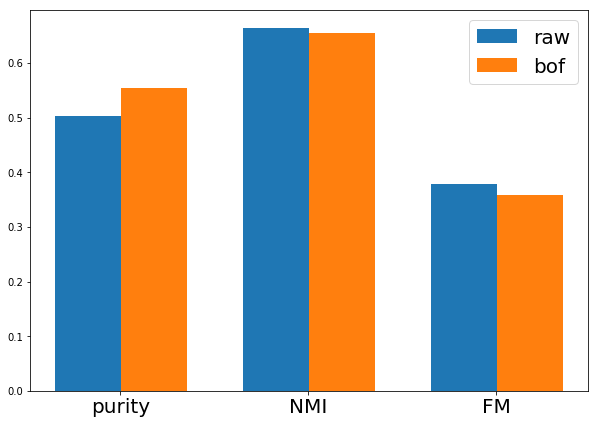

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar([0, 1, 2], eval_raw, 0.35)

rects2 = ax.bar([0.35, 1.35, 2.35], eval_bof, 0.35)

ax.legend( (rects1[0], rects2[0]), ('raw', 'bof'), fontsize=20)
xTickMarks = ['purity', 'NMI', 'FM']
ax.set_xticks([0.17, 1.17, 2.17])
xtickNames = ax.set_xticklabels(xTickMarks, fontsize=20)
plt.show()

## Clustering deep CNN features

* CNN pretrained on a large and diverse supervised task (ImageNet)
* Extract feature that are generic and can be used for many CV tasks
* Example here: Using VGG19 features to solve the unsupervised UMist task

### Extract features

In [25]:
# import tensorflow as tf
# from keras.preprocessing import image
# from keras.models import Model

# from keras.applications.vgg19 import preprocess_input
# import keras.applications.vgg19 as vgg19

# base_model = vgg19.VGG19(weights='imagenet')
# base_model.summary()

In [26]:
# layer = "flatten"

# feat_extor = Model(inputs=base_model.input, 
#                    outputs=base_model.get_layer(layer).output)
# inp_size = (224, 224)
# n_im = 575

# data = []
# for i in range(n_im):
#     img = image.load_img("%s/%s.png" % (im_path, i), 
#                          target_size = inp_size)
#     img = image.img_to_array(img)
#     img = np.expand_dims(img, axis = 0)
#     img = preprocess_input(img)

#     data.append(np.ndarray.flatten(feat_extor.predict(img)))

# data = np.array(data)

# print(data.shape)

In [27]:
import pickle

archi = "vgg19"
layer = "flatten"

feat_path = "./umist/cnn_features/"
feat_file = open(feat_path + "%s_%s.p" % (archi, layer), "rb")
data = pickle.load(feat_file)
feat_file.close()

print(data.shape)

(575, 25088)


### Cluster

In [28]:
preds_vgg19_flatten = agg20.fit_predict(data)

print("purity: ", purity(preds_vgg19_flatten, true_labels))
print("NMI: ", NMI(preds_vgg19_flatten, true_labels))
print("FM: ", FM(preds_vgg19_flatten, true_labels))

eval_vgg19 = [purity(preds_vgg19_flatten, true_labels), NMI(preds_vgg19_flatten, true_labels), FM(preds_vgg19_flatten, true_labels)]

purity:  0.5930434782608696
NMI:  0.7174127182978459
FM:  0.3964349269394585


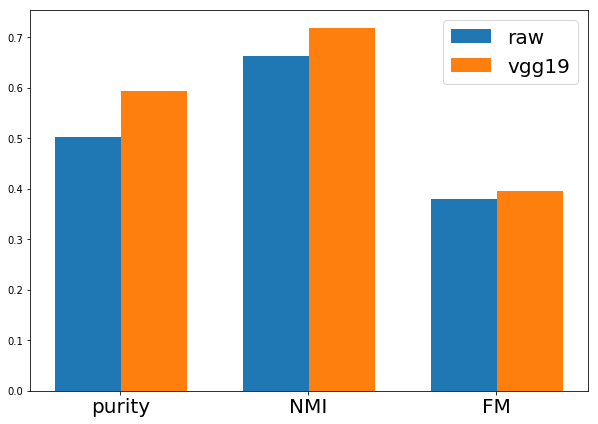

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar([0, 1, 2], eval_raw, 0.35)
rects2 = ax.bar([0.35, 1.35, 2.35], eval_vgg19, 0.35)

ax.legend( (rects1[0], rects2[0]), ('raw', 'vgg19'), fontsize=20)
xTickMarks = ['purity', 'NMI', 'FM']
ax.set_xticks([0.17, 1.17, 2.17])
xtickNames = ax.set_xticklabels(xTickMarks, fontsize=20)
plt.show()

### Compare different layers

In [30]:
import pickle

archi = "vgg19"
layers = ["flatten",  "fc1", "fc2"]

feat_path = "./umist/cnn_features/"

data = []
for i in range(3):
    feat_file = open(feat_path + "%s_%s.p" % (archi, layers[i]), "rb")
    data.append(pickle.load(feat_file))
    feat_file.close()

    print(data[i].shape)

(575, 25088)
(575, 4096)
(575, 4096)


In [31]:
preds_vgg19 = [agg20.fit_predict(data[i]) for i in range(3)]

purities = [purity(preds_vgg19[i], true_labels) for i in range(3)]
NMIs = [NMI(preds_vgg19[i], true_labels) for i in range(3)]
FMs = [FM(preds_vgg19[i], true_labels) for i in range(3)]

print("purity: ", purities)
print("NMI: ", NMIs)
print("FM: ", FMs)

eval_vgg19 = [[purities[i], NMIs[i], FMs[i]] for i in range(3)]

purity:  [0.5930434782608696, 0.6539130434782608, 0.6295652173913043]
NMI:  [0.7174127182978459, 0.7659327130096644, 0.739616161147719]
FM:  [0.3964349269394585, 0.5179995871192826, 0.4719619969331237]


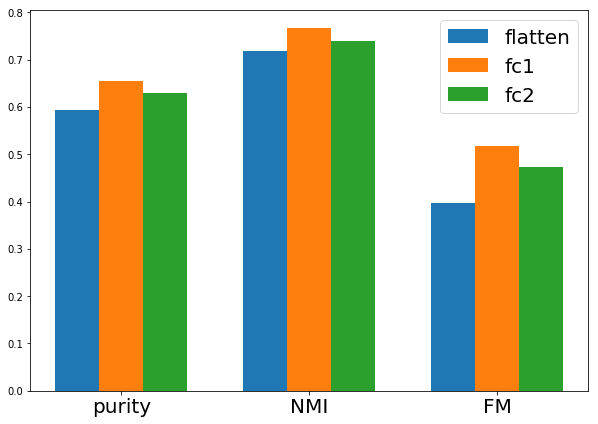

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar([0, 1.5, 3], eval_vgg19[0], 0.35)
rects2 = ax.bar([0.35, 1.85, 3.35], eval_vgg19[1], 0.35)
rects3 = ax.bar([0.70, 2.20, 3.70], eval_vgg19[2], 0.35)

ax.legend( (rects1[0], rects2[0], rects3[0]), ('flatten', 'fc1', 'fc2'), fontsize=20)
xTickMarks = ['purity', 'NMI', 'FM']
ax.set_xticks([0.35, 1.85, 3.35])
xtickNames = ax.set_xticklabels(xTickMarks, fontsize=20)
plt.show()